# Importing Essential Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import plot_model

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

# ASL (American Sign Language)

# Loading the Dataset

In [ ]:
train_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


# Data Visualization (EDA)

In [ ]:
fig = px.histogram(train_df, x='label',color='label', title='Distribution of Labels in Training Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

In [ ]:
fig = px.histogram(test_df, x='label',color='label', title='Distribution of Labels in Testing Dataset')

fig.update_layout(
    xaxis_title='Label',
    yaxis_title='Count',
    showlegend=False,
    bargroupgap=0.1,
)

fig.show()

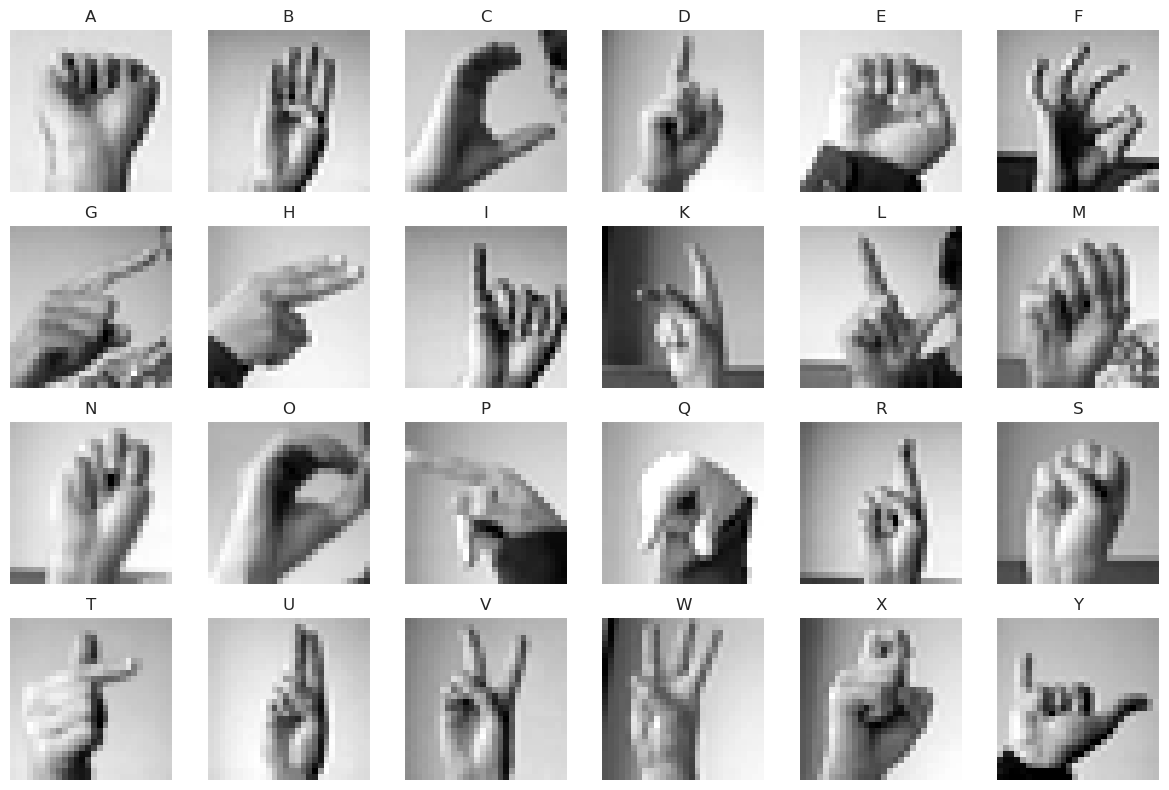

In [ ]:
# Group the dataframe by the 'label' column
label_groups = train_df.groupby('label')

# Iterate over each label group and display one image
fig, axs = plt.subplots(4, 6, figsize=(12, 8))

for i, (label, group) in enumerate(label_groups):
    # Get the first image from the group
    image = group.iloc[0, 1:].values.reshape(28, 28)

    # Calculate the subplot index
    row = i // 6
    col = i % 6

    # Convert label to integer and add 65 to get ASCII value
    ascii_value = int(label) + 65

    # Display the image
    axs[row, col].imshow(image, cmap='gray')
    axs[row, col].set_title(chr(ascii_value))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

# Preprocessing the Data

In [ ]:
X_train = train_df.drop(labels = ["label"],axis = 1)
y_train = train_df["label"]

In [ ]:
X_test = test_df.drop(labels = ["label"],axis = 1)
y_test = test_df["label"]

In [ ]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [ ]:
# Reshape the data to match the input shape of the CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Convert the labels to one-hot encoded format
num_classes = 25
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(27455, 28, 28, 1)
(27455, 25)
(7172, 28, 28, 1)
(7172, 25)


# Model Architecture

In [ ]:
# Create the CNN model
model = Sequential()
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 128, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(num_classes, activation = "softmax"))

# Compile the model
model.compile(optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       3328      
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 128)       409728    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 128)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        36928     
                                                      

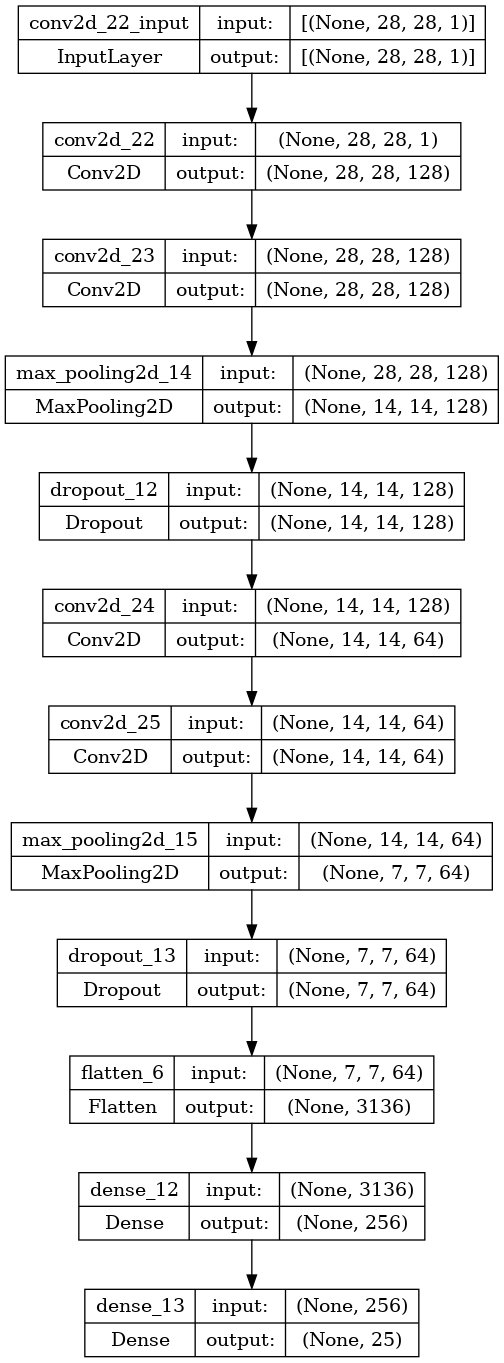

In [ ]:
plot_model(model, to_file='/kaggle/working/model_architecture1.png', show_shapes=True, show_layer_names=True)

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

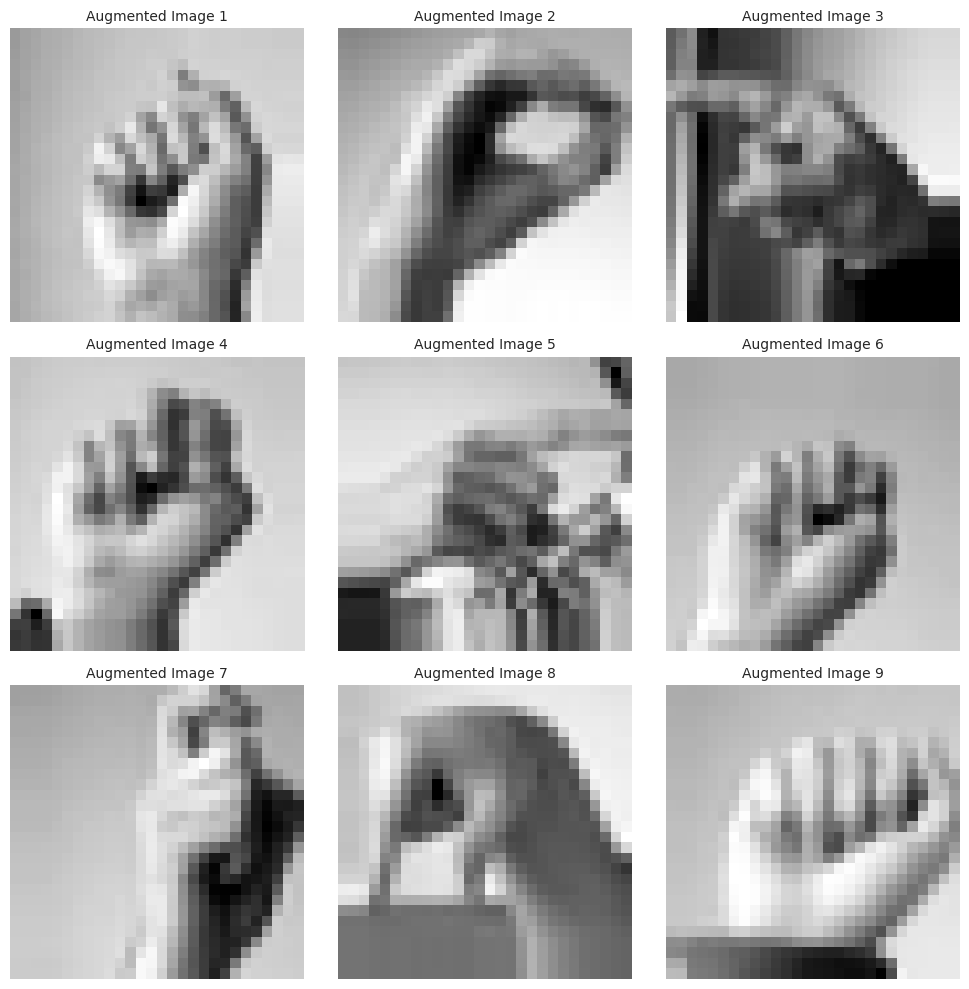

In [ ]:
# Generate augmented images
augmented_images = []
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for img in X_batch:
        augmented_images.append(img)
    break

# Display augmented images
plt.figure(figsize=(10, 10))
for i, image in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f'Augmented Image {i + 1}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


# Fitting of the Model

In [ ]:
#Training the model
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=3,factor=0.5, min_lr=0.0001)

history = model.fit_generator(datagen.flow(X_train,y_train), epochs = 25, validation_data = (X_test,y_test), verbose = 1, callbacks=[learning_rate_reduction])

Epoch 1/25
  6/858 [..............................] - ETA: 10s - loss: 4.0674 - accuracy: 0.0365  

2024-03-31 17:01:00.919059: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_6/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


858/858 [==============================] - 13s 14ms/step - loss: 1.1888 - accuracy: 0.6338 - val_loss: 0.1495 - val_accuracy: 0.9487 - lr: 0.0010
Epoch 2/25
858/858 [==============================] - 12s 13ms/step - loss: 0.1963 - accuracy: 0.9361 - val_loss: 0.0635 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 3/25
858/858 [==============================] - 12s 13ms/step - loss: 0.1035 - accuracy: 0.9672 - val_loss: 0.0196 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 4/25
858/858 [==============================] - 12s 14ms/step - loss: 0.0751 - accuracy: 0.9770 - val_loss: 0.0291 - val_accuracy: 0.9907 - lr: 0.0010
Epoch 5/25
858/858 [==============================] - 12s 14ms/step - loss: 0.0614 - accuracy: 0.9815 - val_loss: 0.0112 - val_accuracy: 0.9968 - lr: 0.0010
Epoch 6/25
858/858 [==============================] - 12s 14ms/step - loss: 0.0555 - accuracy: 0.9843 - val_loss: 5.5966e-04 - val_accuracy: 1.0000 - lr: 0.0010
Epoch 7/25
858/858 [==============================] - 12s 13ms/st

# Model Evaluation

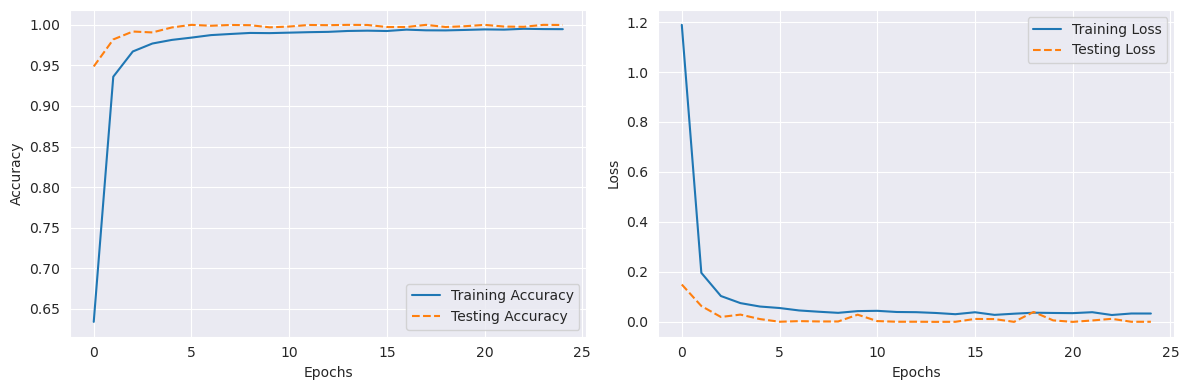

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

225/225 [==============================] - 1s 4ms/step


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

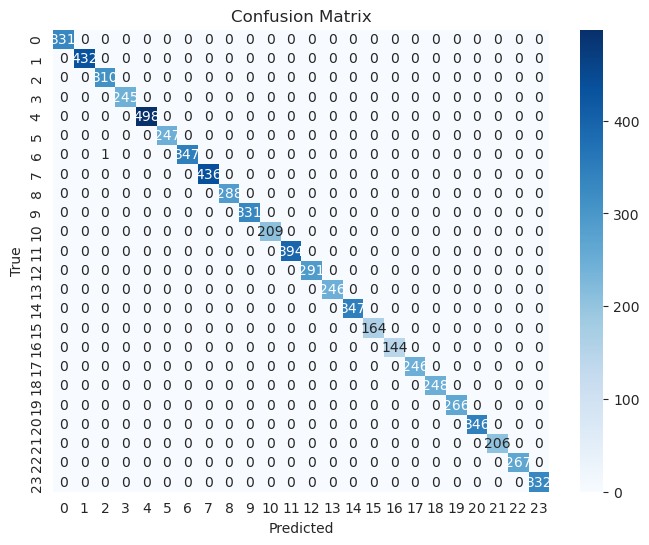

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

225/225 [==============================] - 1s 5ms/step - loss: 4.3392e-04 - accuracy: 0.9999
validation test results - Loss: 0.0004339158767834306 - Accuracy: 99.98605847358704%


# Saving the Model

In [ ]:
model.save("americanSignLanguage.h5")

1/1 [==============================] - 0s 18ms/step


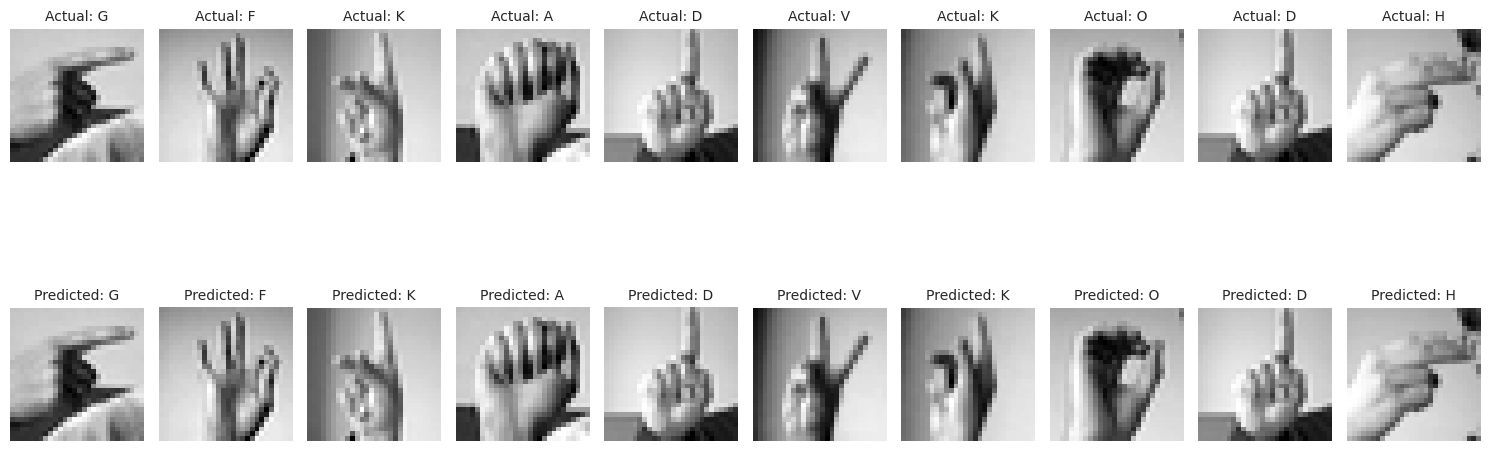

In [ ]:
# Get model predictions for the first 10 images in the test set
predictions_asl = model.predict(X_test[:10])
predicted_labels_asl = np.argmax(predictions_asl, axis=1)
actual_labels_asl = np.argmax(y_test[:10], axis=1)

# Decode labels using ASCII values
predicted_labels_asl = [chr(label + 65) for label in predicted_labels_asl]
actual_labels_asl = [chr(label + 65) for label in actual_labels_asl]

# Display actual vs predicted images for the first 10 images
plt.figure(figsize=(15, 7))
for i in range(10):
    # Display actual image
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {actual_labels_asl[i]}", fontsize=10)
    plt.axis('off')

    # Display predicted image
    plt.subplot(2, 10, i + 11)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels_asl[i]}", fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# <center> -----------------------------  END   ---------------------------</center>

# ISL (Indian Sign Language)

# Loading Datast

In [ ]:
# Define the root directory path
root_dir = "/kaggle/input/indian-sign-language-isl/Indian"

# Maximum number of images to load from each subdir_path
max_images_per_subdir = 500

# Initialize a list to store the image data
image_data = []

# Iterate through the subdirectories in the root directory
for label in os.listdir(root_dir):
    # Check if the subdirectory is numeric
    if not label.isdigit():
        # Get the path to the subdirectory
        subdir_path = os.path.join(root_dir, label)

        # Use list comprehension to load a maximum images
        images = [
            {'label': label, 'color_image': Image.open(os.path.join(subdir_path, file))}
            for i, file in enumerate(os.listdir(subdir_path))
            if i < max_images_per_subdir
        ]

        # Extend the image_data list with the loaded images
        image_data.extend(images)

        # Check if the maximum number of images has been reached
        if len(images) == max_images_per_subdir:
            continue

# Create a DataFrame from the image data
df = pd.DataFrame(image_data)

In [ ]:
df

,label,color_image
0,N,<PIL.JpegImagePlugin.JpegImageFile image mode=...
1,N,<PIL.JpegImagePlugin.JpegImageFile image mode=...
2,N,<PIL.JpegImagePlugin.JpegImageFile image mode=...
3,N,<PIL.JpegImagePlugin.JpegImageFile image mode=...
4,N,<PIL.JpegImagePlugin.JpegImageFile image mode=...
...,...,...
12995,J,<PIL.JpegImagePlugin.JpegImageFile image mode=...
12996,J,<PIL.JpegImagePlugin.JpegImageFile image mode=...
12997,J,<PIL.JpegImagePlugin.JpegImageFile image mode=...
12998,J,<PIL.JpegImagePlugin.JpegImageFile image mode=...


In [ ]:
df['label'].unique()

array(['N', 'R', 'B', 'I', 'F', 'H', 'E', 'U', 'M', 'X', 'K', 'Q', 'Y',
       'S', 'G', 'A', 'O', 'T', 'V', 'Z', 'C', 'P', 'L', 'W', 'D', 'J'],
      dtype=object)

# Data Visualization (EDA)

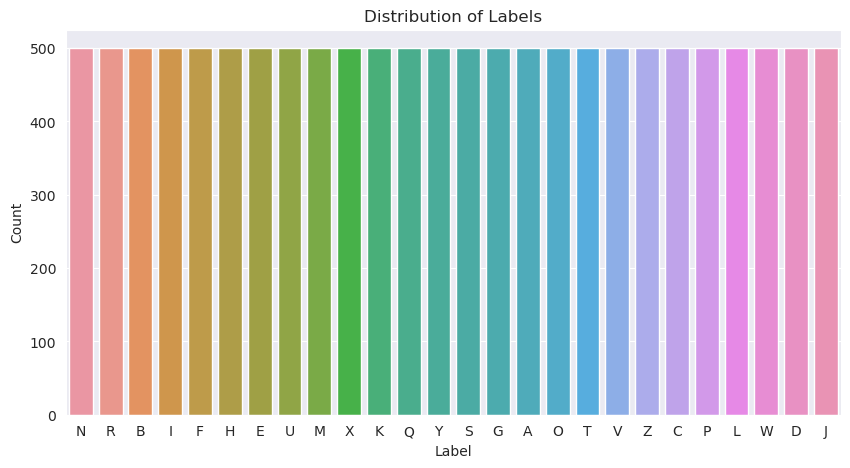

In [ ]:
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.countplot(data=df,x='label')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')

plt.show()

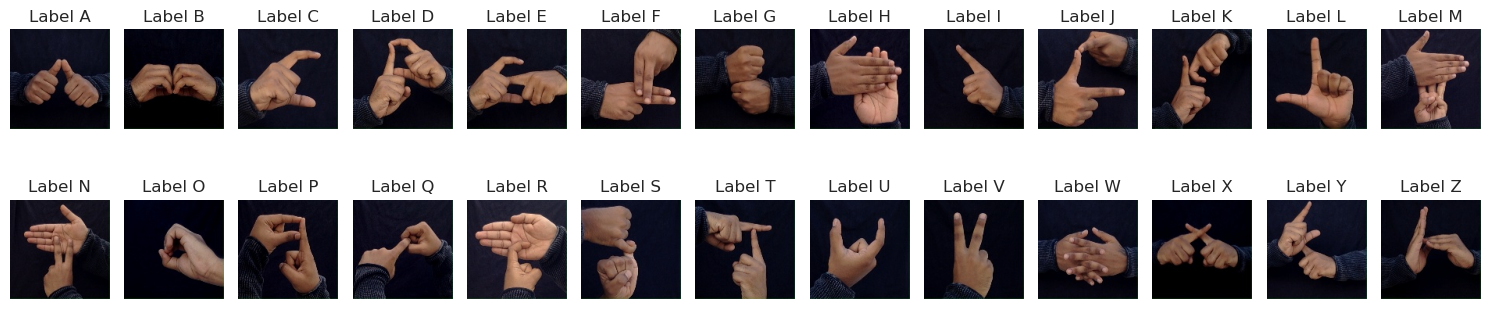

In [ ]:
fig, axs = plt.subplots(2,13, figsize=(15, 4))

for i, (label, image) in enumerate(df.groupby('label').first().reset_index()[['label', 'color_image']].itertuples(index=False)):
    ax = axs[i // 13, i % 13]
    ax.imshow(image)
    ax.set_title('Label {}'.format(label))
    ax.axis('off')

plt.axis('off')
plt.tight_layout()
plt.show()

# Data Preprocessing

In [ ]:
# Preprocessing steps
images = np.array(df['color_image'].tolist())
labels = np.array(df['label'])

In [ ]:
# Resize images to desired dimensions
resized_images = []
for image in images:
    resized_image = image.resize((32, 32))  # Resize the image to the desired size
    resized_images.append(np.array(resized_image))
images = np.array(resized_images)

In [ ]:
# Normalize pixel values
images = images / 255.0

In [ ]:
# Map labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Splitting the data into Training and Testing

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
# Convert labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(75, (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(50, (3, 3), strides=1, padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Conv2D(25, (3, 3), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=26, activation='softmax'))

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 75)        2100      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 75)       300       
 hNormalization)                                                 
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 75)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 50)        33800     
                                                                 
 dropout_14 (Dropout)        (None, 16, 16, 50)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 16, 16, 50)      

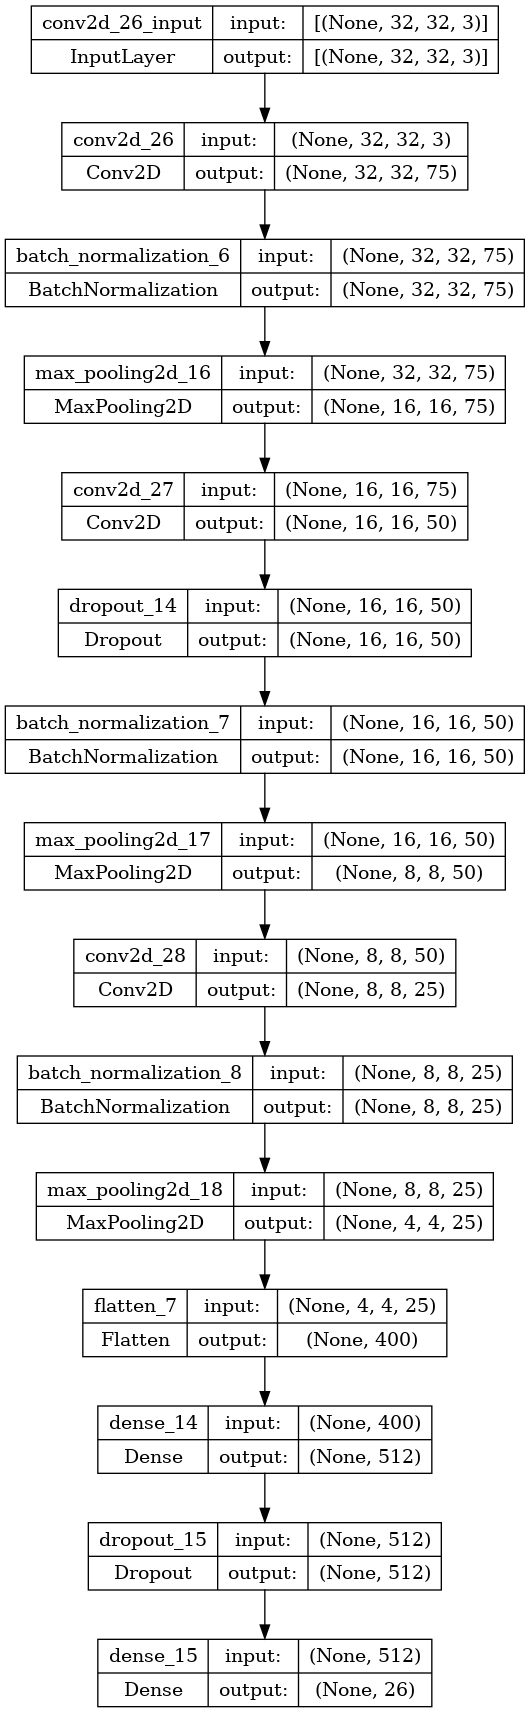

In [ ]:
plot_model(model, to_file='/kaggle/working/model_architecture2.png', show_shapes=True, show_layer_names=True)

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

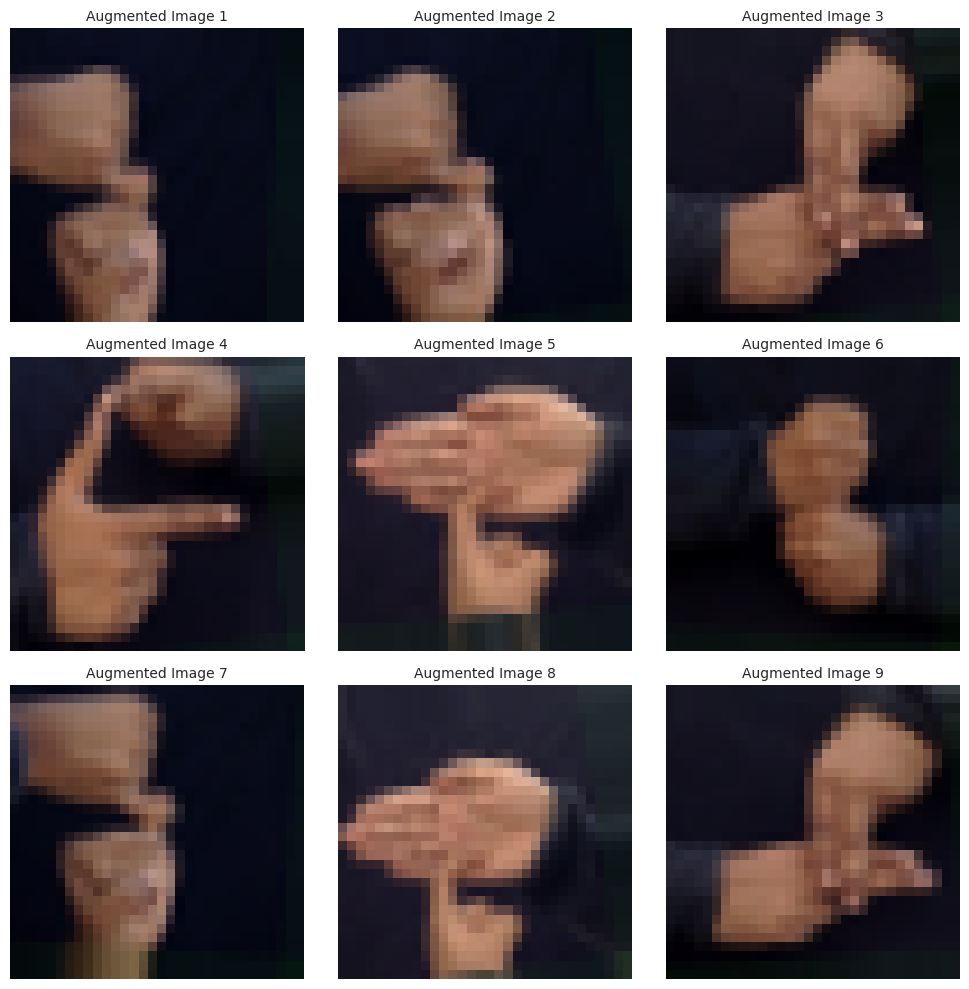

In [ ]:
augmented_images = []
for X_batch, _ in datagen.flow(X_train, y_train, batch_size=9):  # Use underscore to ignore the labels
    for img in X_batch:
        augmented_images.append(img)
    break  # Generate only one batch of augmented images

# Display augmented images
plt.figure(figsize=(10, 10))
for i, image in enumerate(augmented_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f'Augmented Image {i + 1}', fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Fitting the Model

In [ ]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.001)
history = model.fit(datagen.flow(X_train,y_train), epochs=25, validation_data=(X_test, y_test), callbacks=[learning_rate_reduction])

Epoch 1/25


2024-03-31 17:13:27.915611: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


325/325 [==============================] - 7s 19ms/step - loss: 0.5805 - accuracy: 0.8589 - val_loss: 2.2675 - val_accuracy: 0.3596 - lr: 0.0100
Epoch 2/25
325/325 [==============================] - 6s 19ms/step - loss: 0.0711 - accuracy: 0.9868 - val_loss: 0.0227 - val_accuracy: 0.9985 - lr: 0.0100
Epoch 3/25
325/325 [==============================] - 6s 18ms/step - loss: 0.0360 - accuracy: 0.9936 - val_loss: 0.0071 - val_accuracy: 0.9981 - lr: 0.0100
Epoch 4/25
325/325 [==============================] - 6s 19ms/step - loss: 0.0278 - accuracy: 0.9944 - val_loss: 0.0047 - val_accuracy: 0.9992 - lr: 0.0100
Epoch 5/25
325/325 [==============================] - 6s 18ms/step - loss: 0.0210 - accuracy: 0.9962 - val_loss: 0.0082 - val_accuracy: 0.9962 - lr: 0.0100
Epoch 6/25
325/325 [==============================] - 6s 18ms/step - loss: 0.0169 - accuracy: 0.9966 - val_loss: 0.0015 - val_accuracy: 1.0000 - lr: 0.0100
Epoch 7/25
325/325 [==============================] - 6s 19ms/step - loss: 

# Model Evaluation

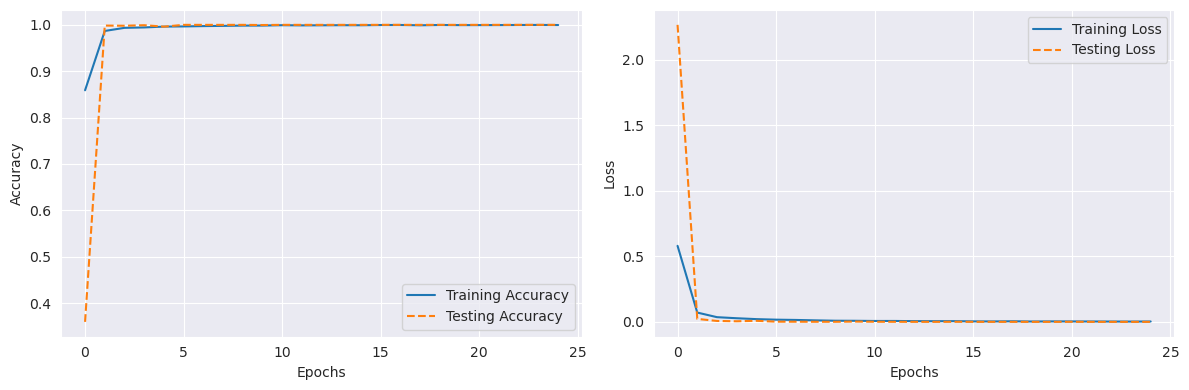

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Define plot labels and styles
plot_labels = ['Accuracy', 'Loss']
plot_styles = ['-', '--']

# Plot training and testing accuracy/loss
for i, metric in enumerate(['accuracy', 'loss']):
    train_metric = history.history[metric]
    test_metric = history.history['val_' + metric]
    axs[i].plot(train_metric, label='Training ' + metric.capitalize(), linestyle=plot_styles[0])
    axs[i].plot(test_metric, label='Testing ' + metric.capitalize(), linestyle=plot_styles[1])
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(plot_labels[i])
    axs[i].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Get the model's predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

82/82 [==============================] - 0s 2ms/step


In [ ]:
# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

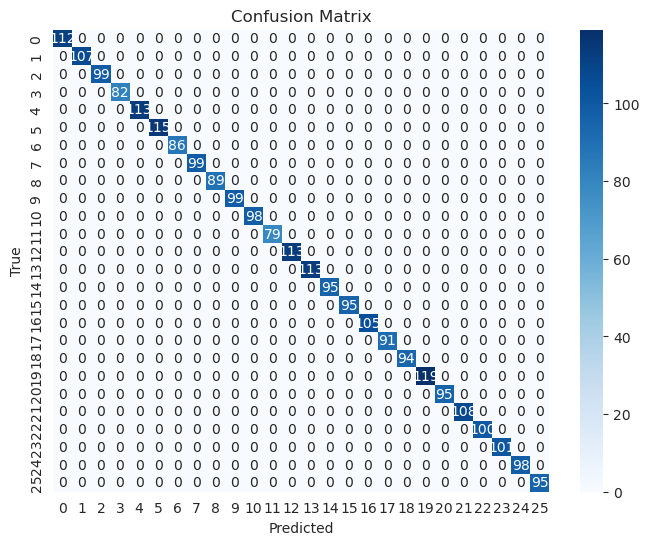

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test, y_test)
print(f'validation test results - Loss: {accuracy[0]} - Accuracy: {accuracy[1]*100}%')

82/82 [==============================] - 0s 3ms/step - loss: 1.1199e-04 - accuracy: 1.0000
validation test results - Loss: 0.00011198674474144354 - Accuracy: 100.0%


# Saving the Model

In [ ]:
model.save("indianSignLanguage.h5")

# <center> -----------------------------  END   ---------------------------</center>

1/1 [==============================] - 0s 18ms/step


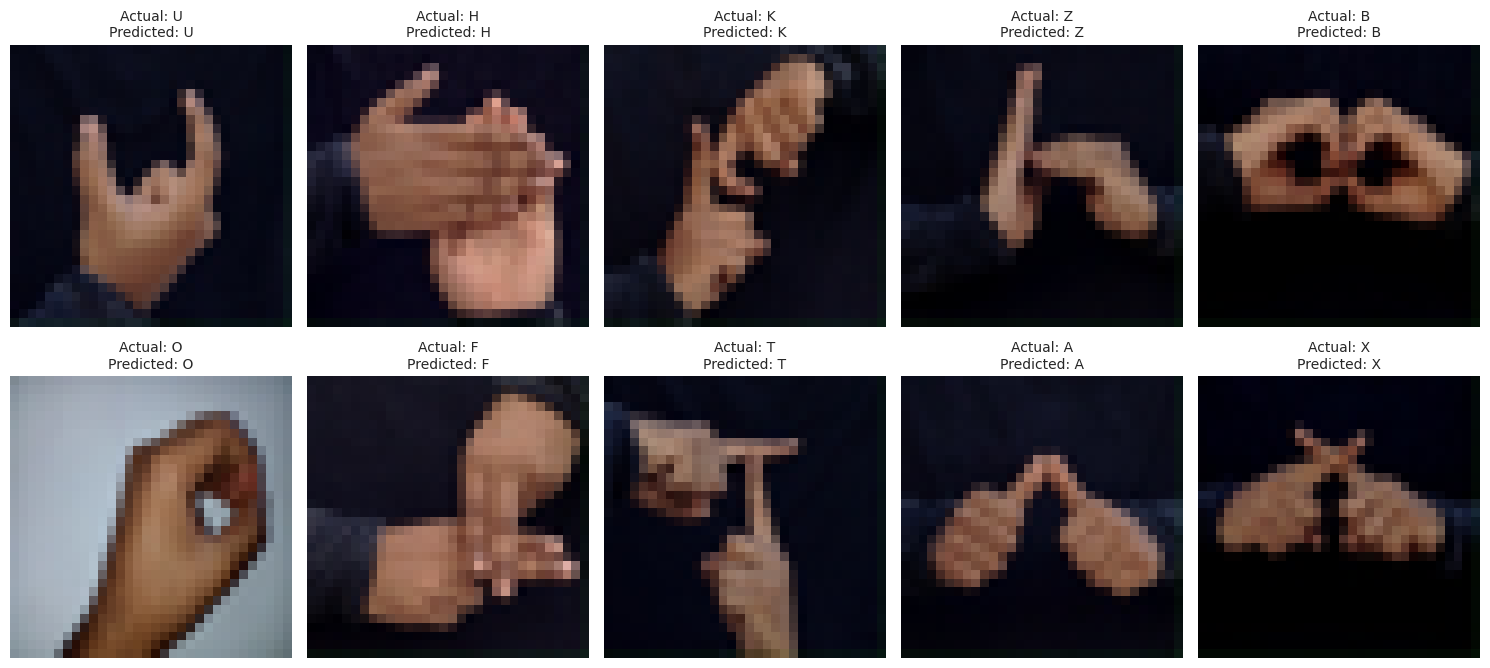

In [ ]:
# Get model predictions for the first 10 images in the test set
predictions = model.predict(X_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:10], axis=1)

# Decode labels using label encoder
predicted_labels = label_encoder.inverse_transform(predicted_labels)
actual_labels = label_encoder.inverse_transform(actual_labels)

# Display actual and predicted labels along with images for the first 10 images
plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()
